In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps 
from datetime import date


In [4]:
c_data = pd.read_csv("covid19_cleaned_8_10.zip")

C:\Users\dpale\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10,12,13,14,15,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Have the columns on hand.
c_data.columns

Index(['Unnamed: 0', 'ID', 'age', 'sex', 'city', 'province', 'country',
       'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'chronic_disease',
       'outcome', 'date_death_or_discharge', 'admin3', 'admin2', 'admin1',
       'travel_history_binary', 'hospitalized', 'deceased', 'fever', 'cough',
       'fatigue', 'headache', 'dizziness', 'sore throat', 'pneumonia',
       'respiratory', 'nausea', 'diarrhea', 'severe_r'],
      dtype='object')

In [6]:
# Start by looking at case counts by country.
c_countries = c_data.dropna(subset=["country"])

In [7]:
c_country_grouped= c_data.groupby(["country"]).count()
c_country_grouped

,Unnamed: 0,ID,age,sex,city,province,latitude,longitude,date_onset_symptoms,date_admission_hospital,...,cough,fatigue,headache,dizziness,sore throat,pneumonia,respiratory,nausea,diarrhea,severe_r
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8,8,8,8,0,8,8,8,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,1267,1267,1267,1267,1239,1243,1267,1267,1,9,...,0,0,0,0,0,0,0,0,0,0
Andorra,1,1,1,1,0,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Angola,4,4,4,4,4,0,4,4,1,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,1137,1137,1137,1137,342,792,1137,1137,3,0,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2,2,2,2,2,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Vietnam,34,34,34,34,28,30,34,34,16,18,...,14,14,14,14,14,14,14,14,14,14
"Virgin Islands, U.S.",2,2,2,2,0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Country')

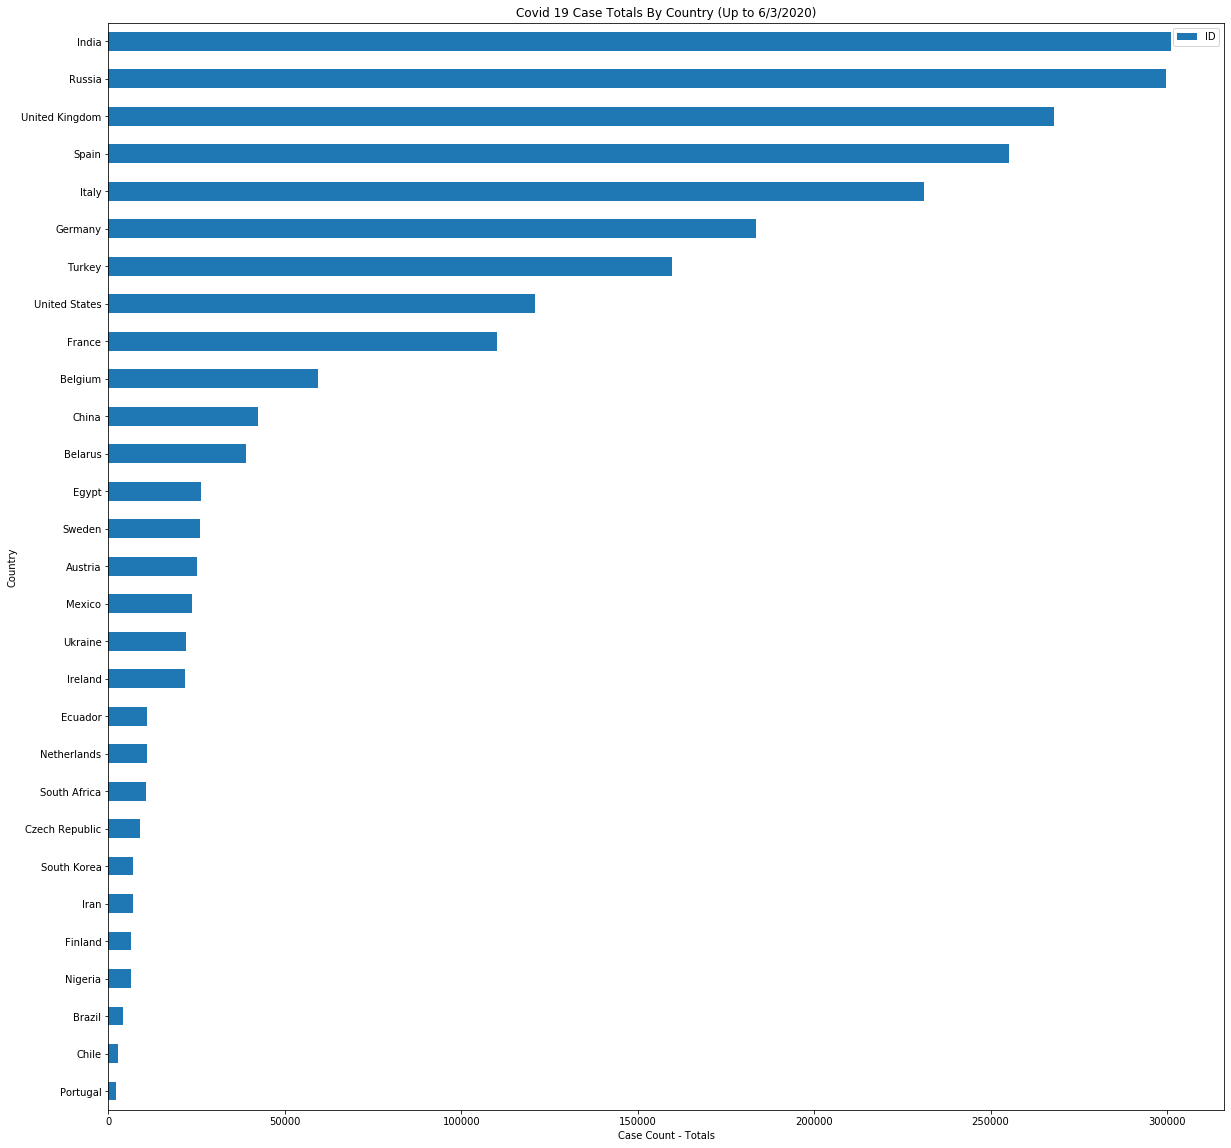

In [8]:
c_large_countries = c_country_grouped.loc[c_country_grouped["ID"] > 2000]
ax = c_large_countries.sort_values(by="ID").plot(kind="barh", 
                                            y="ID", 
                                            figsize=(20, 20),
                                            title="Covid 19 Case Totals By Country (Up to 6/3/2020)",
                                           )
ax.set_xlabel("Case Count - Totals")
ax.set_ylabel("Country")

In [9]:
# Group the data by counts on dates.
c_data["date_confirmation_formatted"] = pd.to_datetime(c_data["date_confirmation"], format="%d.%m.%Y")
byTime = c_data.groupby(["date_confirmation_formatted"]).count()
datecumsum = np.cumsum(byTime["ID"])
byTime["cumulative"] = datecumsum

In [10]:
byTimeAndCountry = c_data.groupby(["date_confirmation_formatted", "country"]).count()

In [11]:
byTimeAndCountry.head()

,,Unnamed: 0,ID,age,sex,city,province,latitude,longitude,date_onset_symptoms,date_admission_hospital,...,cough,fatigue,headache,dizziness,sore throat,pneumonia,respiratory,nausea,diarrhea,severe_r
date_confirmation_formatted,country,,,,,,,,,,,,,,,,,,,,,
2020-01-06,South Korea,2,2,2,2,0,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-12,Thailand,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2020-01-15,Japan,2,2,2,2,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2020-01-16,Japan,2,2,2,2,0,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,Thailand,2,2,2,2,2,2,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Slicing totals by country
for country in c_country_grouped.index:
    countrySlice = byTimeAndCountry.loc[(slice(None), country), :]
    byTimeAndCountry.loc[(slice(None), country),"country_total"] = np.cumsum(countrySlice["ID"])

In [13]:
byTimeAndCountry.head()

,,Unnamed: 0,ID,age,sex,city,province,latitude,longitude,date_onset_symptoms,date_admission_hospital,...,fatigue,headache,dizziness,sore throat,pneumonia,respiratory,nausea,diarrhea,severe_r,country_total
date_confirmation_formatted,country,,,,,,,,,,,,,,,,,,,,,
2020-01-06,South Korea,2,2,2,2,0,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,2.0
2020-01-12,Thailand,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2.0
2020-01-15,Japan,2,2,2,2,0,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2.0
2020-01-16,Japan,2,2,2,2,0,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,4.0
2020-01-17,Thailand,2,2,2,2,2,2,2,2,0,2,...,0,0,0,0,0,0,0,0,0,4.0


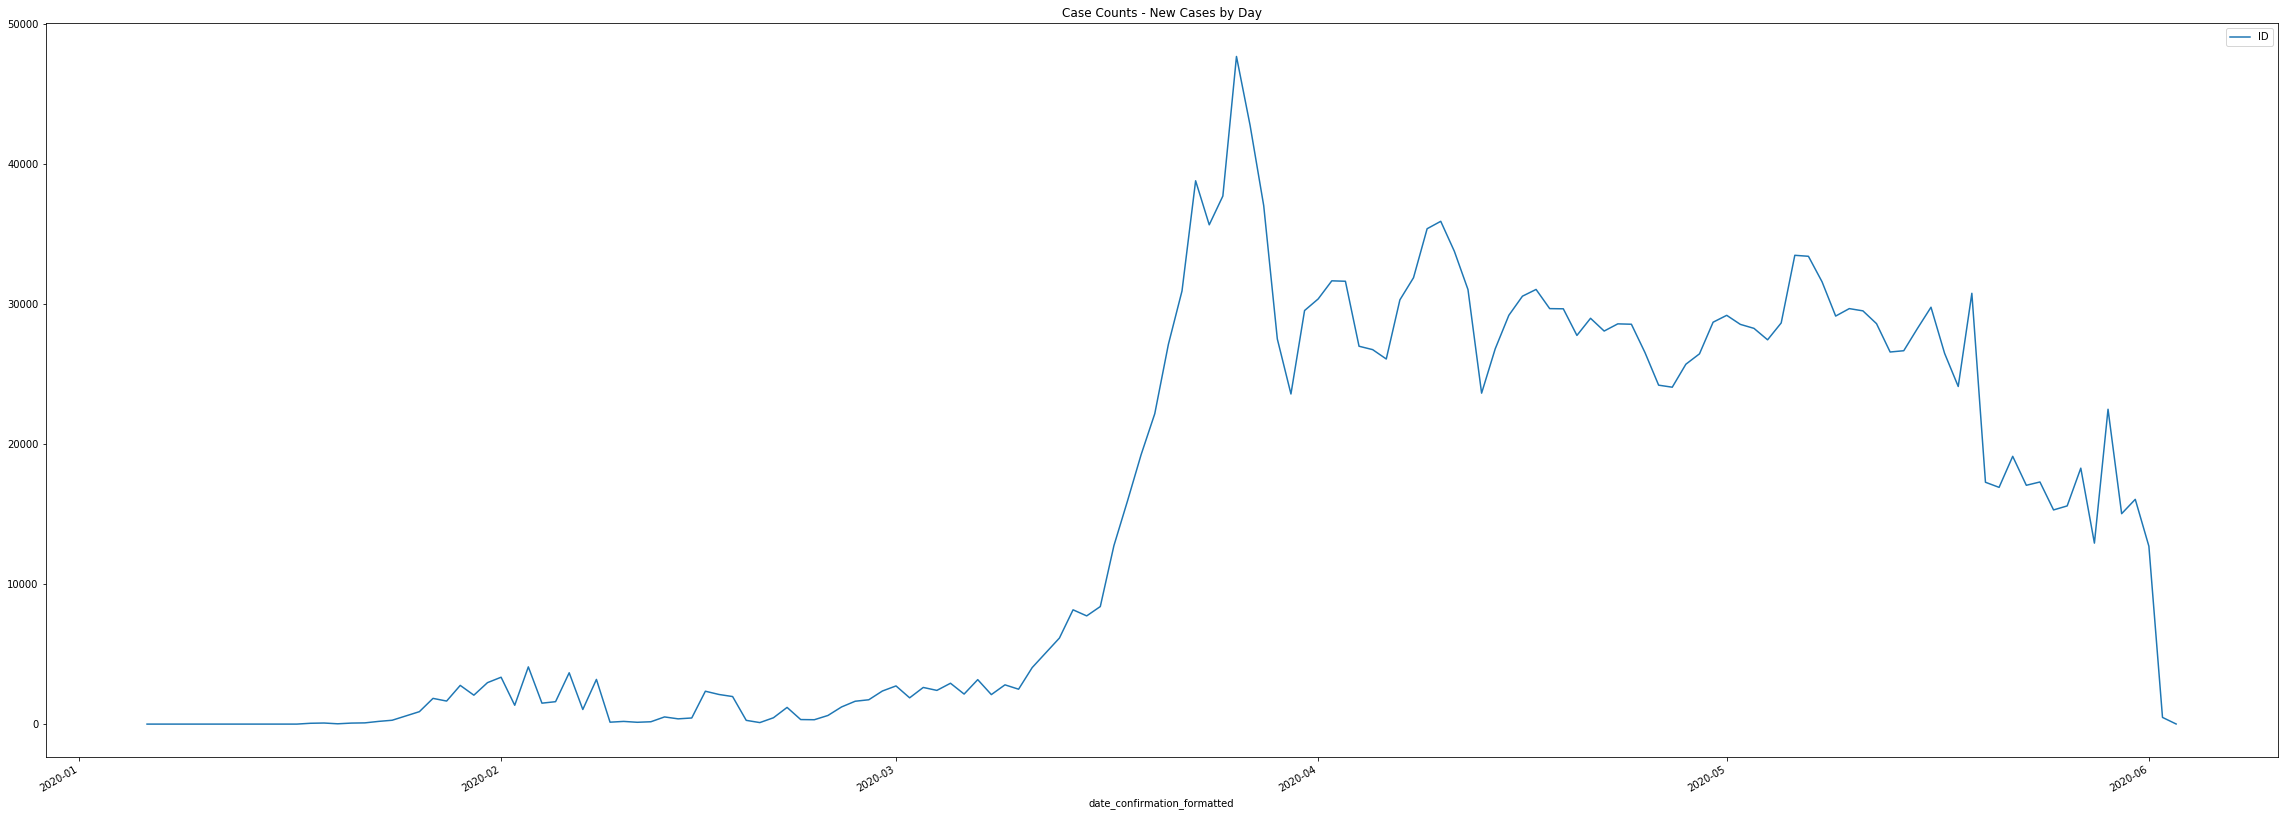

In [14]:
byTime.plot(y="ID", figsize=(40,15), title="Case Counts - New Cases by Day")

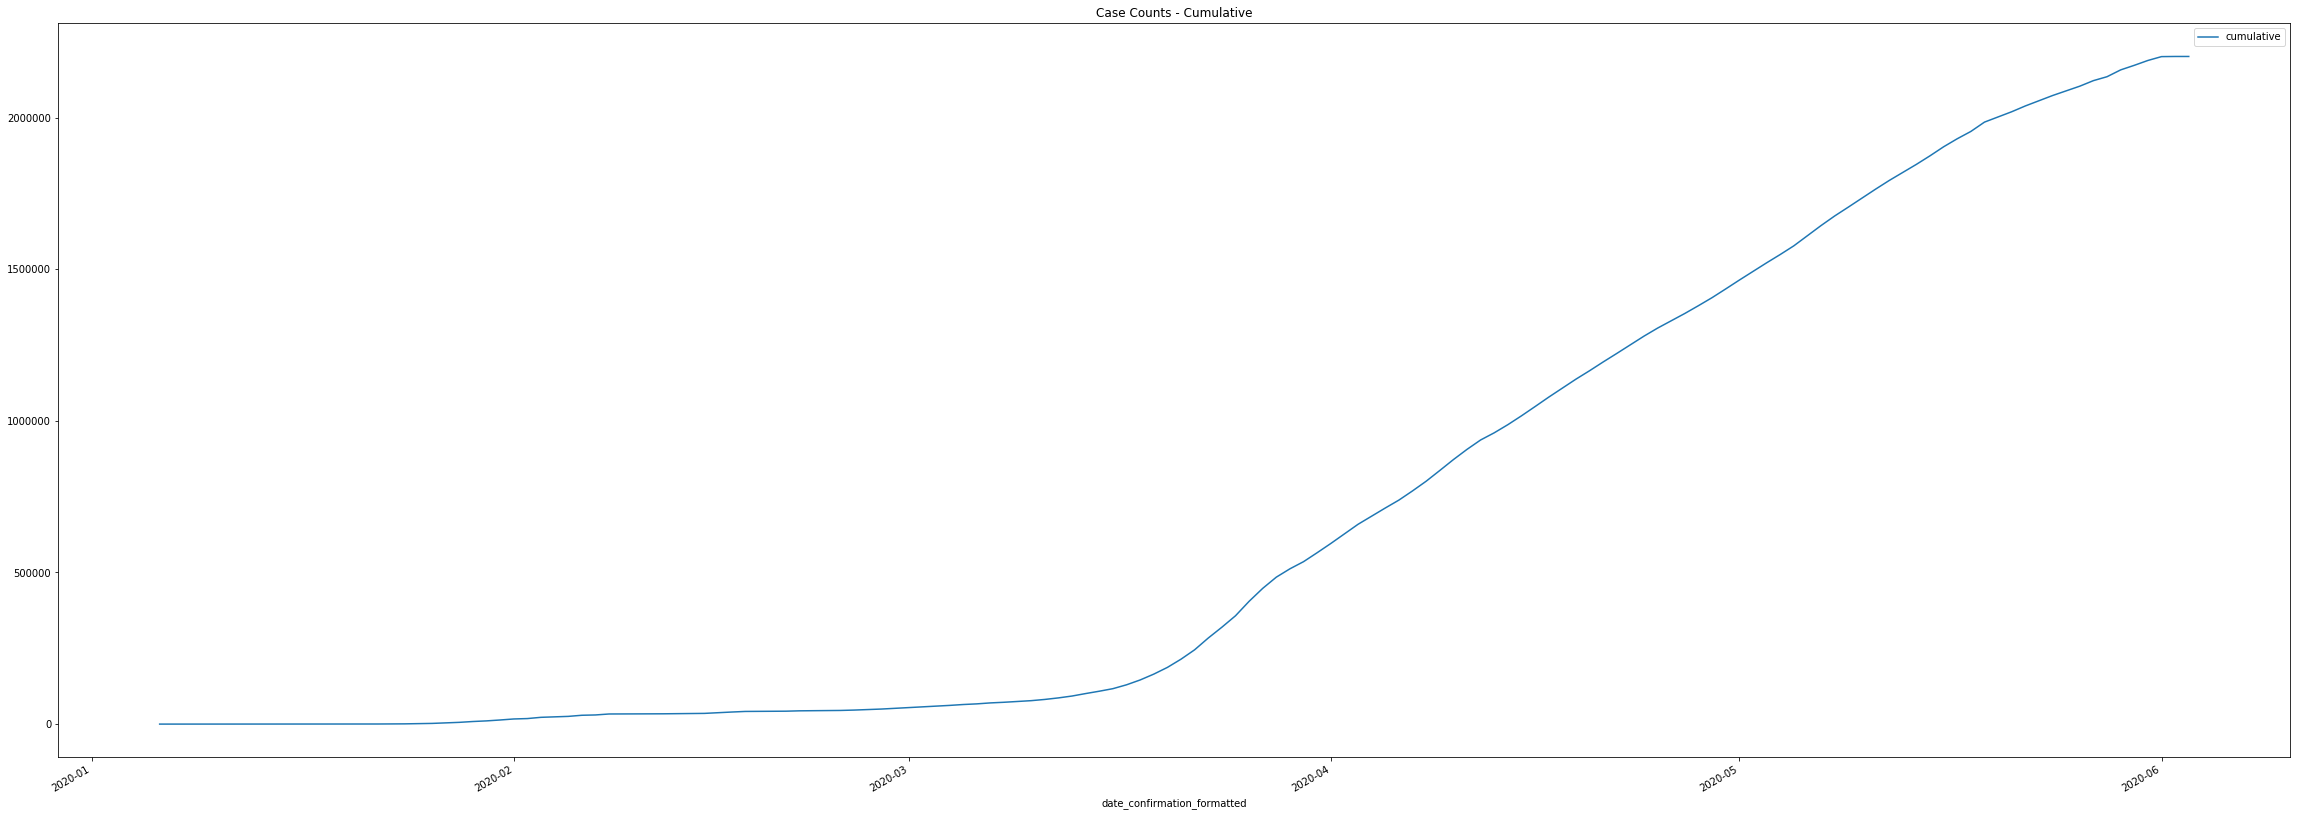

In [15]:
byTime.plot(y="cumulative", figsize=(40,15), title="Case Counts - Cumulative")

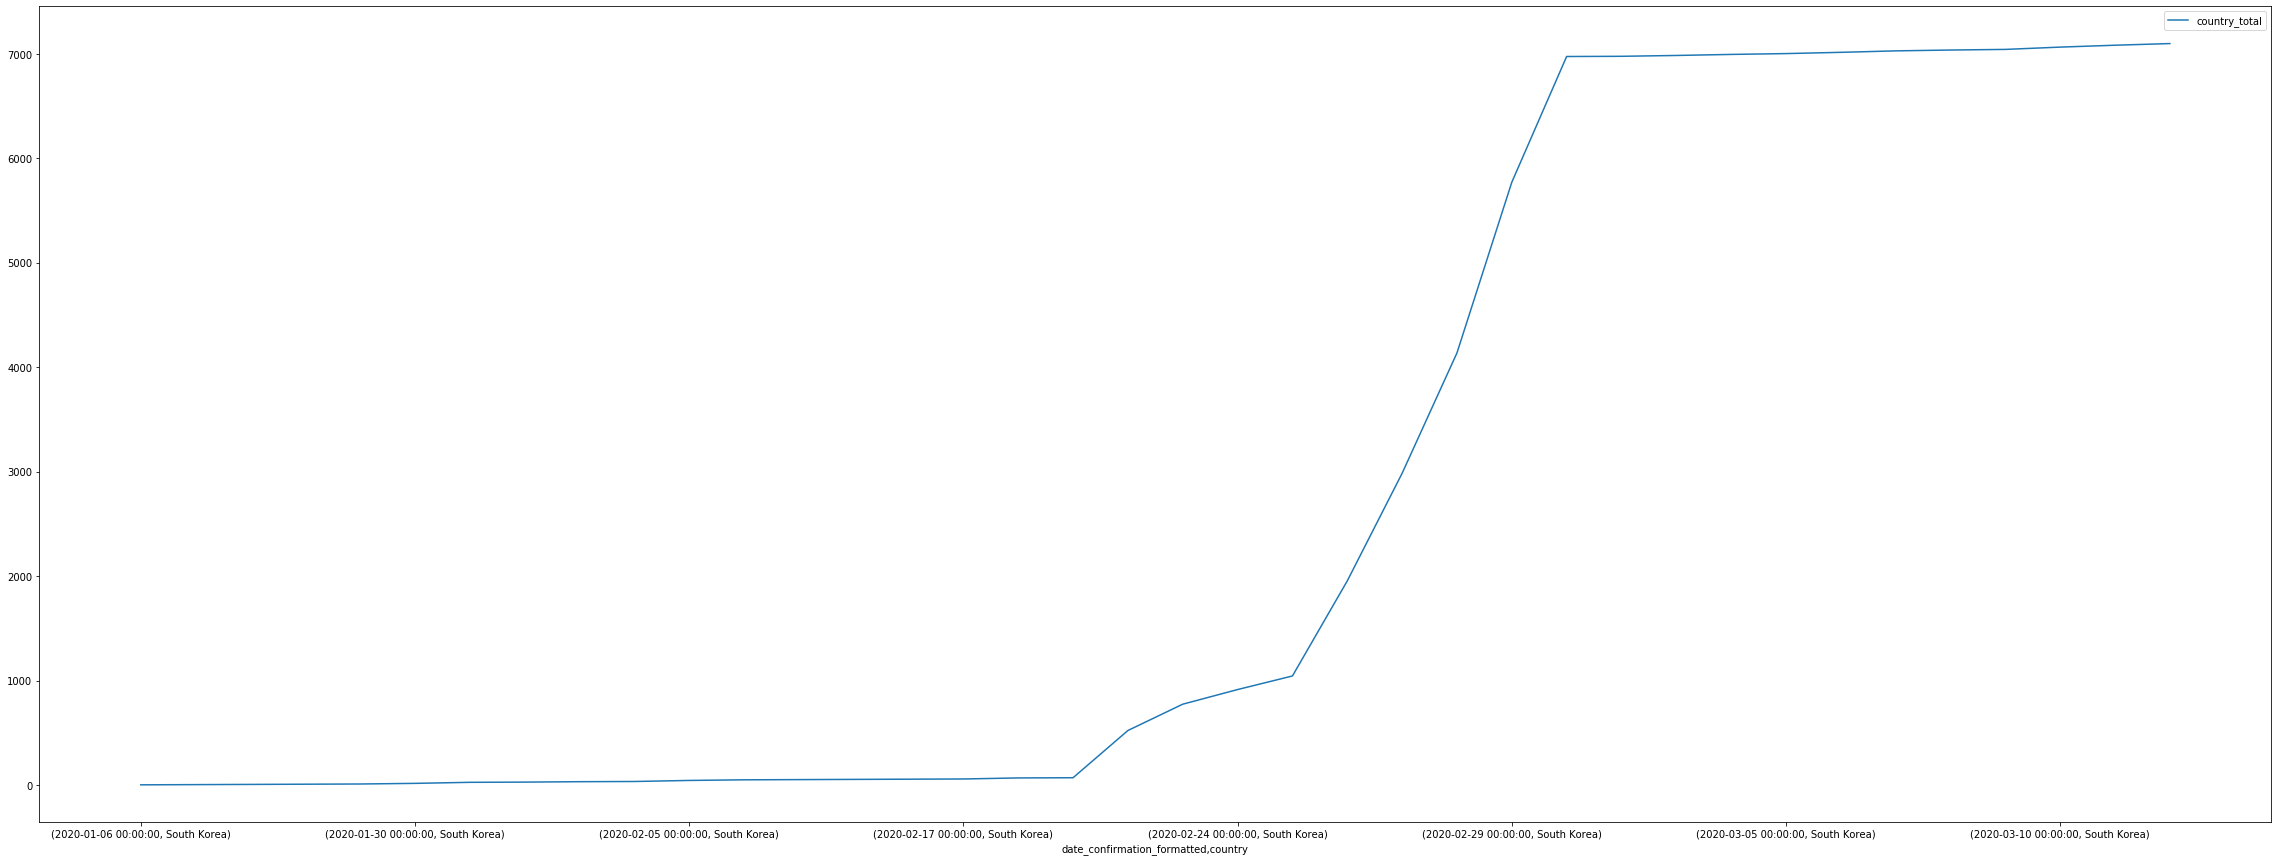

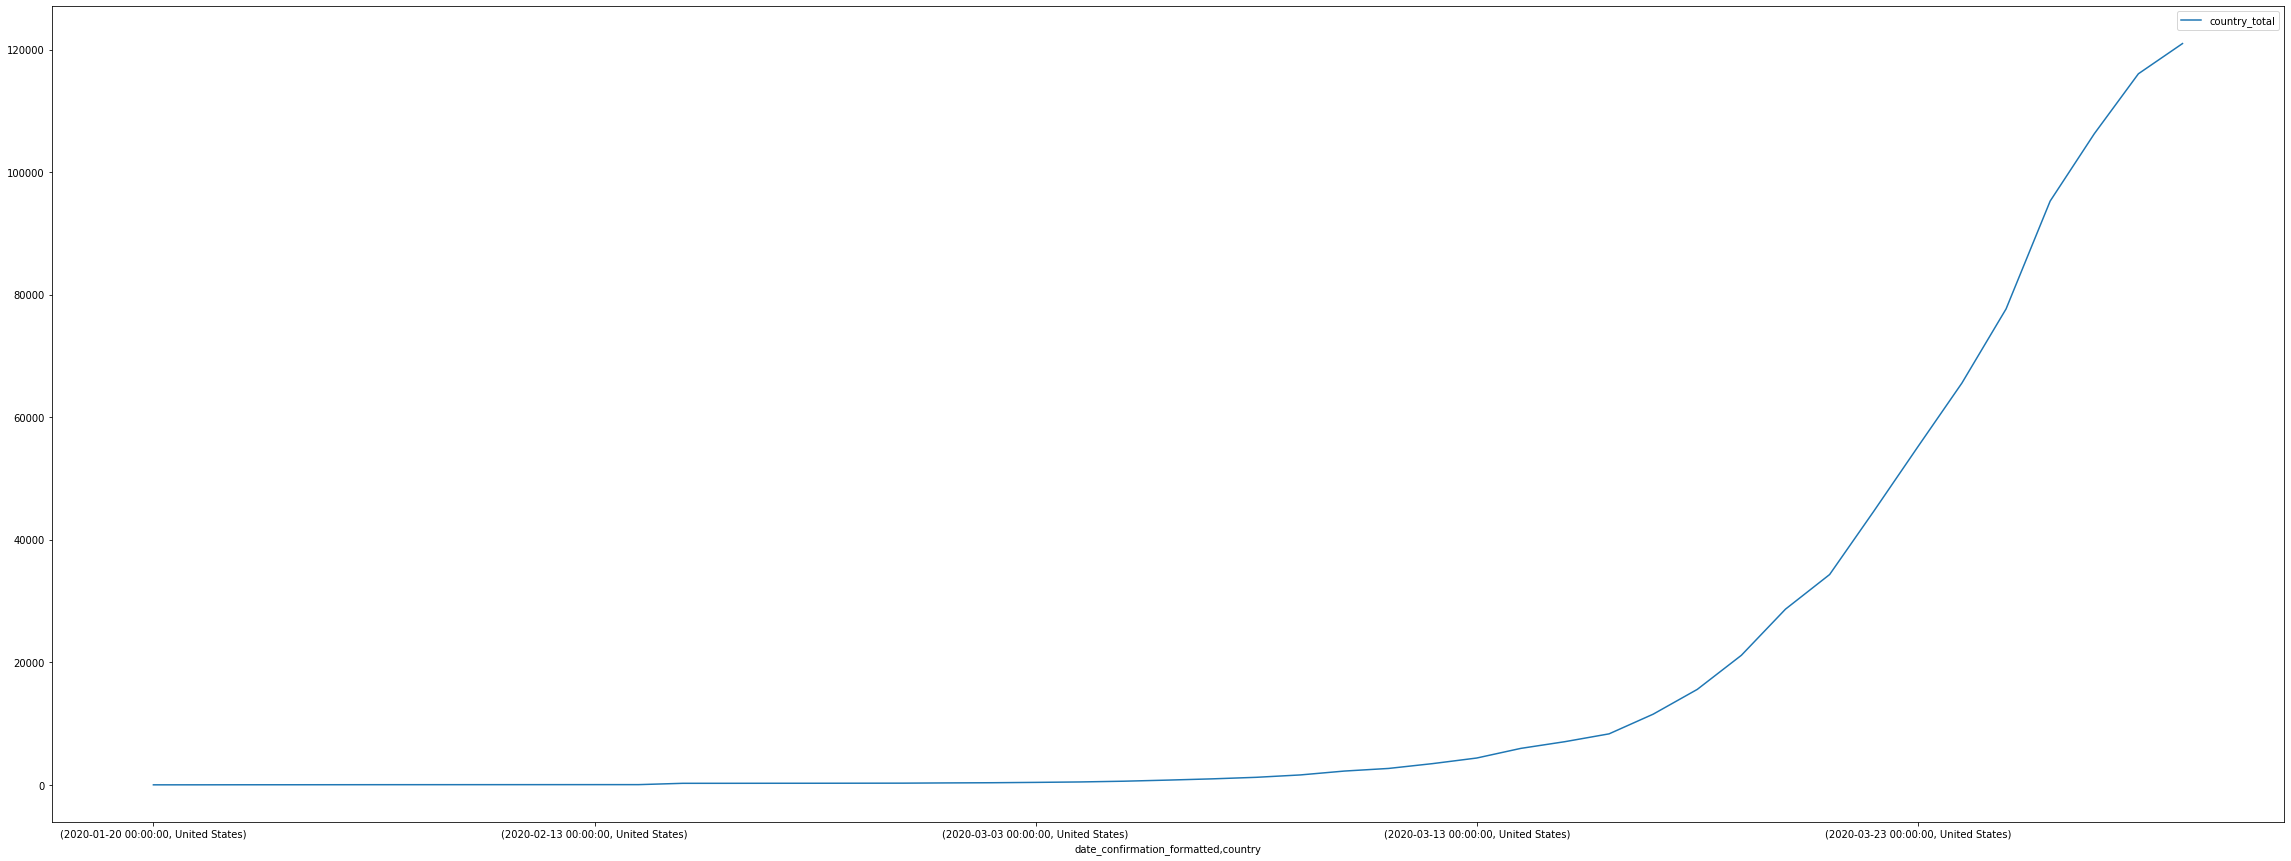

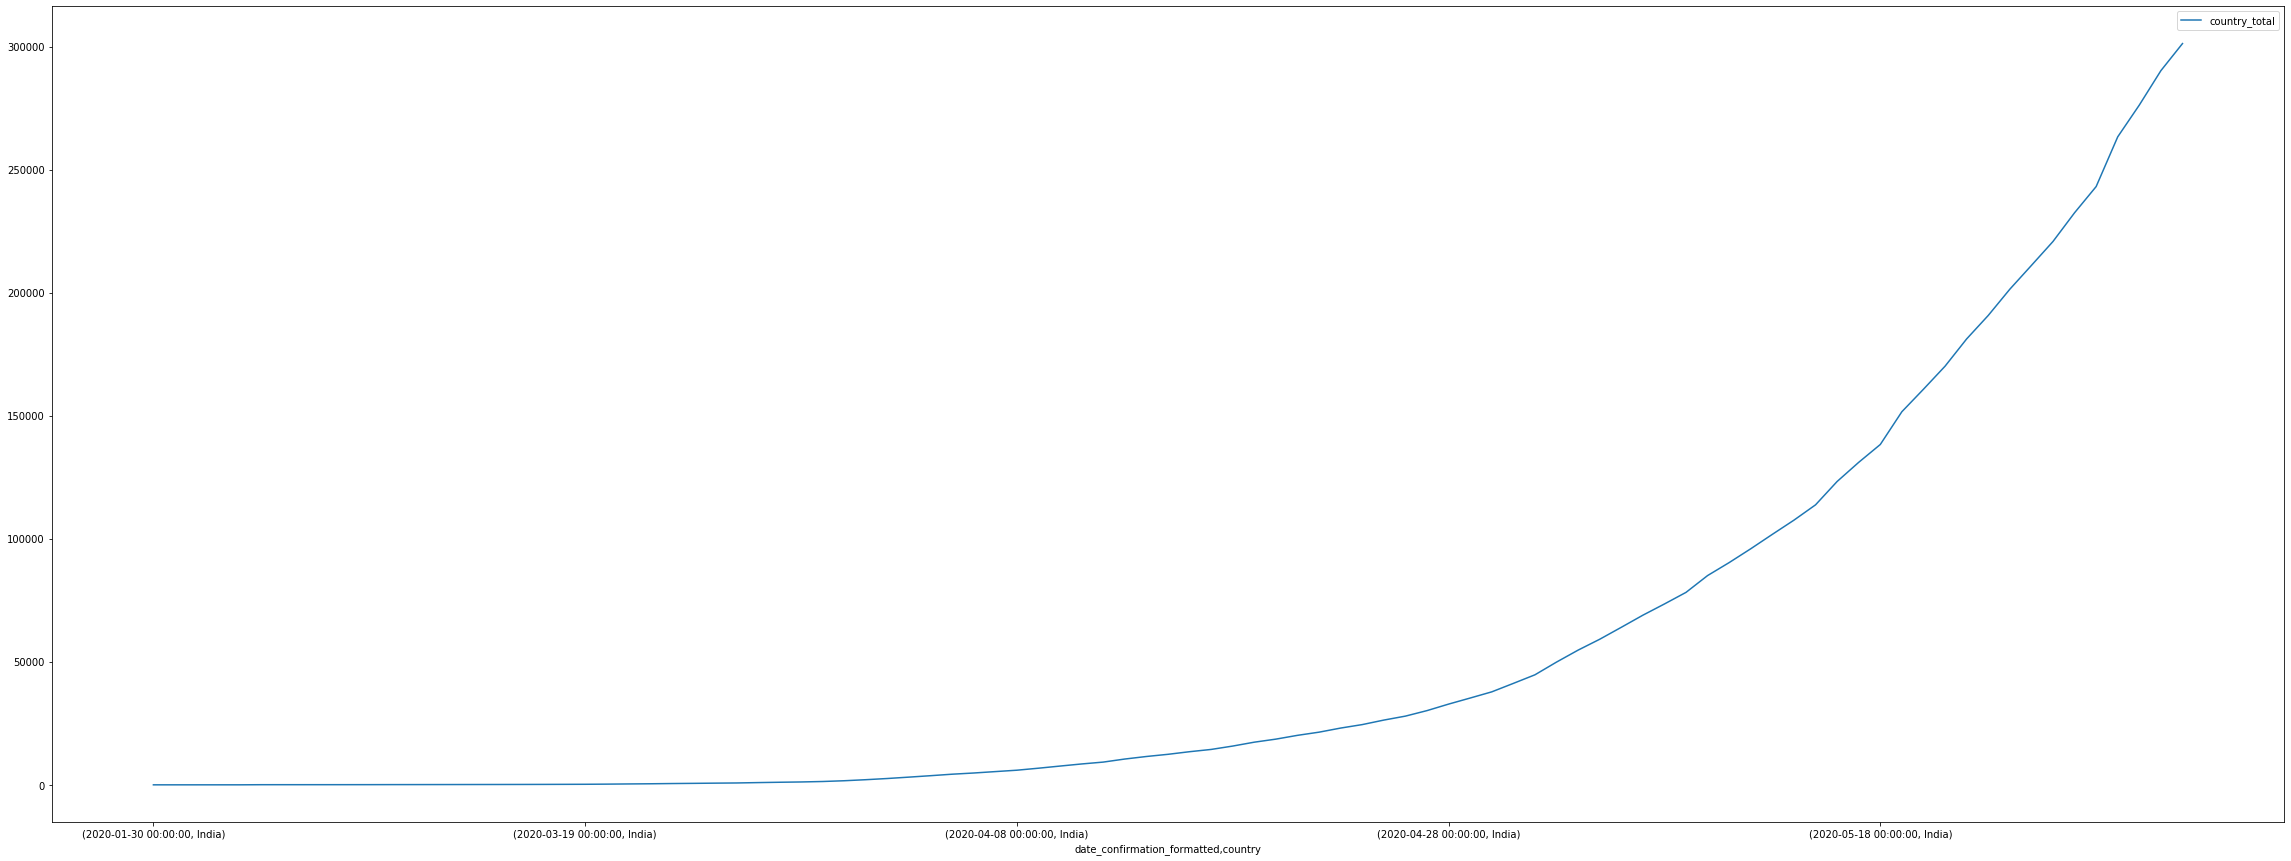

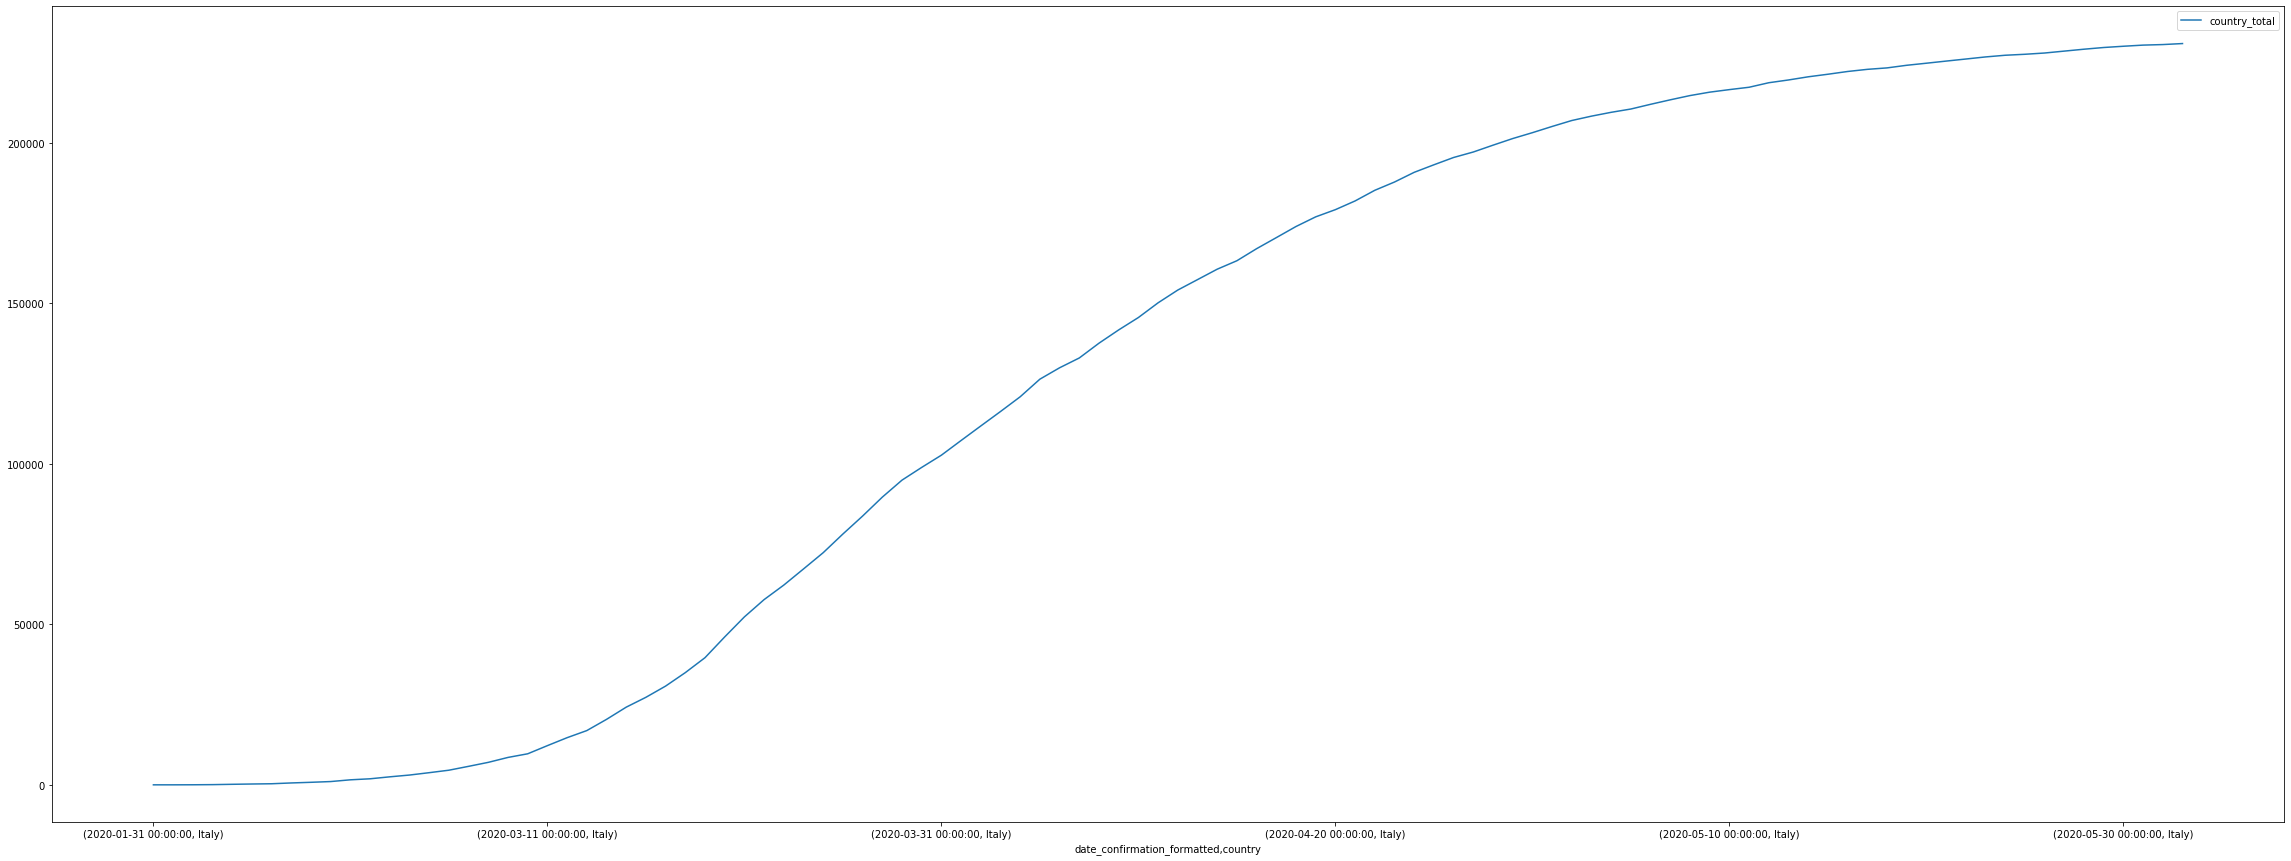

In [16]:
byTimeAndCountry.loc[(slice(None), "South Korea"), :].plot(y="country_total", figsize=(40,15))
byTimeAndCountry.loc[(slice(None), "United States"), :].plot(y="country_total", figsize=(40,15))
byTimeAndCountry.loc[(slice(None), "India"), :].plot(y="country_total", figsize=(40,15))
byTimeAndCountry.loc[(slice(None), "Italy"), :].plot(y="country_total", figsize=(40,15))

In [18]:
byTime.columns

Index(['Unnamed: 0', 'ID', 'age', 'sex', 'city', 'province', 'country',
       'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'chronic_disease',
       'outcome', 'date_death_or_discharge', 'admin3', 'admin2', 'admin1',
       'travel_history_binary', 'hospitalized', 'deceased', 'fever', 'cough',
       'fatigue', 'headache', 'dizziness', 'sore throat', 'pneumonia',
       'respiratory', 'nausea', 'diarrhea', 'severe_r', 'cumulative'],
      dtype='object')

In [19]:
byWeek = pd.cut


2        5
326      1
37710    1
26073    1
74       1
        ..
170      1
15028    1
26800    1
1969     1
618      1
Name: travel_history_binary, Length: 139, dtype: int64